## Install matplotlib into the conda virtual environment first

# Prediting Suicide Rates From Human Development Index

Suicide is a complex social issue that touches many families and individuals.  Individual opinions on suicide are varied. Reasons for commiting or considering suicide are even more varied.  

We all have those moments where we say to ourselves "I should just kill myself."  These are not truly suicidal thoughts, just like "I could kill him" is not truly a call for murder. Those contemplating suicide may show certain behaviors that are often not recognized until after the suicide, others show no signs.

The reasons for suicide can only be guessed at by those left behind from a note, behaviors, or other artifacts.  Others are well documented or can be decidely clear.  
- [Terry Pratchett Suicide Documentary](https://topdocumentaryfilms.com/terry-pratchett-choosing-to-die/)
- [Other Documentaries](https://documentaryaddict.com/tags/suicide)

I am not attempting to sway opinions on suicide, just to gain a better understanding of contributing factors when the reasons seem unclear.

### Questions

This data set does not allow us to come any closer to an answer for questions that are indicated in above statements, but it does allow to consider some aspects of socioeconomic factors that may impact it.

- #### What factors lead to high suicide rates across the world?
- #### Why do some countries have higher suicide rates than others?
- #### Do the rates vary by age group and gender and by country?
- #### What other analysis could be performed on this data or what other information might make this a more valuable dataset?

### Dataset
- Dataset obtained from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) on 2019-May-20 and was last updated on 2018-Dec-01.
- Dataset was created by [Rusty](https://www.kaggle.com/russellyates88)
- Dataset was developed from: 
    - United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

    - World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

    - [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

    - World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/




### Initial Examination of Dataset

In [2]:
# imports needed for analyzing data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

%matplotlib inline

In [3]:
# read the suicide dataset into pandas
df = pd.read_csv('./master.csv')

In [4]:
# review data provided by the dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The dataset shows redundant information in some cases and data that may be subject to interpretation in others.  Specifically, 'country-year' is just a repeat of 'country' and 'year'.  Also, 'generation' may have categories that are not well-defined and subject to interpretation to determine the value.  

I will be using 'country', 'year', 'suicides/100k pop', 'age', 'sex', and 'HDI for year'.  

[HDI - Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index) is an index that is calculated for a country based on life expectancy, attainable levels of education, and income.  It is important to note that the calculation of HDI changed in 2010.  While this would have to accounted for in a more thorough stufy, for this instance I  will only be using the HDI for year 2010.  It is an assumption that the HDI was approximately the same for previous years and may represent a slight bias.

**suicides/100k pop** is a normalized rate of suicide determined by:
$$ \frac{suicides}{100k\ pop} = \frac{suicides\_no}{\frac{population}{100000}}$$



### Examination of ranges of parameters being used

In [5]:
# review parameters of data that is of interest in this examination
print(f'Genders: {df.sex.unique()}\n')
print(f'Age groups: {df.age.unique()}\n')
print(f'Data year range: {df.year.min()} - {df.year.max()}\n')
print(f'How many countries are reported in each year; is the data normalizable by country?')
number_countries_year = df['country'].groupby(df['year']).unique()
for i in number_countries_year.keys():
    print(f'{i}: {len(number_countries_year[i])}')

Genders: ['male' 'female']

Age groups: ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']

Data year range: 1985 - 2016

How many countries are reported in each year; is the data normalizable by country?
1985: 48
1986: 48
1987: 54
1988: 49
1989: 52
1990: 64
1991: 64
1992: 65
1993: 65
1994: 68
1995: 78
1996: 77
1997: 77
1998: 79
1999: 83
2000: 86
2001: 88
2002: 86
2003: 86
2004: 84
2005: 84
2006: 85
2007: 86
2008: 85
2009: 89
2010: 88
2011: 86
2012: 81
2013: 80
2014: 78
2015: 62
2016: 16


It appears that the data is not complete for all years.  Some years have more countries than others. This makes a full examination of data impossible for all countries.  I will be narrowing what I look at throughout the project.  

The decade data 1990, 2000, and 2010 will be the years included.  There are not specific reasons I picked those years for this report, just a draw to the decade years.

### A strightforward comparison of suicide rates per year by gender

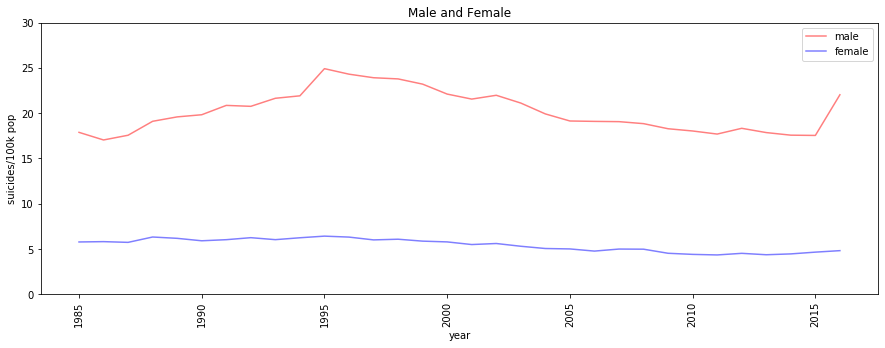

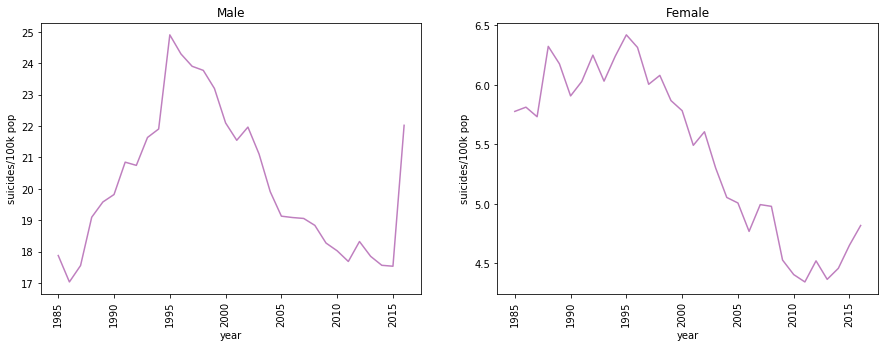

In [28]:
# create dataframe for male and female
df_male = df[df['sex']=='male'].copy()
df_female = df[df['sex']=='female'].copy()

# Comparison on same graph
suicides_by_male = df_male['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)
suicides_by_female = df_female['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)
plt.figure(figsize=(33, 5))
plt.subplot(1,2,1)
plt.plot(suicides_by_male['year'], suicides_by_male['suicides/100k pop'], color='red', alpha=0.5, label='male')
plt.plot(suicides_by_female['year'], suicides_by_female['suicides/100k pop'], color='blue', alpha=0.5, label='female')
plt.title(f'Male and Female')
plt.xlabel('year')
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 30])
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper right')
plt.show()

# group suicide rates by year and plot
suicides_by_male = df_male['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)
suicides_by_female = df_female['suicides/100k pop'].groupby(df['year']).mean().reset_index(level=0)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(suicides_by_male['year'], suicides_by_male['suicides/100k pop'], color='purple', alpha=0.5)
plt.title(f'Male')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')

# plt.figure(figsize=(15, 5))
plt.subplot(1,2,2)
plt.plot(suicides_by_female['year'], suicides_by_female['suicides/100k pop'], color='purple', alpha=0.5)
plt.title(f'Female')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')

plt.show()

Female suicide rate is much lower than male suicide rate.  Both show a peak at about 1995 and have been declining since to a relatively low rate.  There is an uptick that appears around 2016, the last year in the dataset.  However, this is a possible outlier since there is only 16 countries in the dataset for 2016.  The countries for 2016 are predominatly in the area commonly none as Eastern Europe.  Later this notebook will be able to supply evidence that these countries tend to have a high suicide rate.

### Examine HDI data
As noted above I decided to only use the HDI data from 2010 since that is the year they put into place a new calculation to determine this value.

If someone would like to look at HDI from other years, it is possible by changing the value in the variable below - year_of_ineterest.

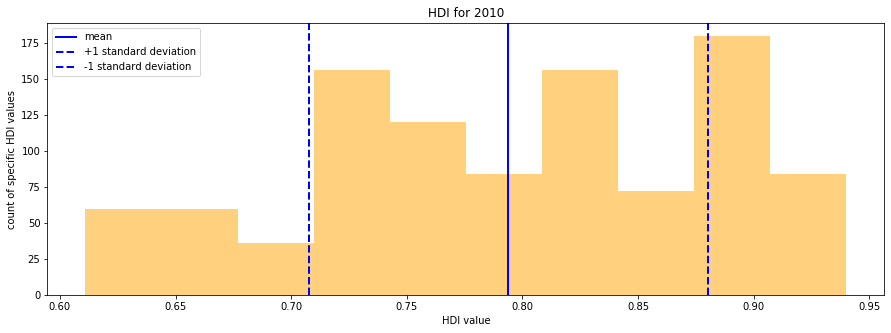

In [25]:
# pick the year you are interested in looking at
year_of_interest = 2010

# get the data
df_year_interest = df[df['year']==year_of_interest].copy()
# There are null values in the column 'HDI for year', these can be safely ignored
missing_values = df['HDI for year'].isnull()
# filter returns truw for null values, need to negate that to get values
hdi = df_year_interest['HDI for year'][~missing_values]

plt.figure(figsize=(15, 5))
plt.hist(hdi, facecolor='orange', alpha=0.5)
# add mean
plt.axvline(hdi.mean(), color='b', linestyle='solid', linewidth=2, label='mean')
# +1 sd
plt.axvline(hdi.mean() + hdi.std(), color='b', linestyle='dashed', linewidth=2, label='+1 standard deviation')
# -1 sd
plt.axvline(hdi.mean() - hdi.std(), color='b', linestyle='dashed', linewidth=2, label='-1 standard deviation')

plt.title(f'HDI for {year_of_interest}')
plt.xlabel('HDI value')
plt.ylabel('count of specific HDI values')
plt.legend(loc='upper left')
plt.show()

In [8]:
hdi_describe = hdi.describe()
print(f'Stats for HDI for {year_of_interest}:\n {hdi_describe}')

Stats for HDI for 2010:
 count    1008.000000
mean        0.793869
std         0.086180
min         0.611000
25%         0.731500
50%         0.801000
75%         0.876500
max         0.940000
Name: HDI for year, dtype: float64


A thorough examination of HDI effect on suicide rate would be an exhaustive process and outside the range of this study.  As a result I have decided to only look at one country from each of the four quartiles shown above and see if any conclusions can be drawn. 

Since there is no guarantee that a country will have an HDI exactly that of a random HDI selection, I have determined to use a range around the mean of the quartile.  After calculating the mean for the quartile, I then find an upper and lower bound by adding or subtracting a small percentage from the mean.  This percantage can be changed to explore effect by changing the size; changes shoulde be made to 'quartile range' below.

Using this method results in a list of countries for each quartile, to make sure I do not select a country on bias, I select the country to use by generating a random integer that is used as an index for the list.  I did not set a random seed so that mutltiple runs results in different countries for an easy observational study of the data.

In [9]:
# set the range desired for the quartile mean
quartile_range = 0.05
qtr_1_mean = (hdi_describe['min'] + hdi_describe['25%']) / 2 
qtr_2_mean = (hdi_describe['25%'] + hdi_describe['50%']) / 2
qtr_3_mean = (hdi_describe['50%'] + hdi_describe['75%']) / 2
qtr_4_mean = (hdi_describe['75%'] + hdi_describe['max']) / 2

print(f'Randomly selected countries:')
# qtr 1 df country
qtr_1_bool_low = df['HDI for year'] > (qtr_1_mean - (quartile_range * qtr_1_mean))
qtr_1_bool_high = df['HDI for year'] < (qtr_1_mean + (quartile_range * qtr_1_mean))
qtr_1_df = df[qtr_1_bool_low & qtr_1_bool_high]
qtr_1_countries = qtr_1_df['country'].unique()
qtr_1_country = qtr_1_countries[random.randint(0, len(qtr_1_countries))]
print(f'qtr_1_country: {qtr_1_country}')

# qtr 2 df country
qtr_2_bool_low = df['HDI for year'] > (qtr_2_mean - (quartile_range * qtr_2_mean))
qtr_2_bool_high = df['HDI for year'] < (qtr_2_mean + (quartile_range * qtr_2_mean))
qtr_2_df = df[qtr_2_bool_low & qtr_2_bool_high]
qtr_2_countries = qtr_2_df['country'].unique()
qtr_2_country = qtr_2_countries[random.randint(0, len(qtr_2_countries))]
print(f'qtr_2_country: {qtr_2_country}')

# qtr 3 df country
qtr_3_bool_lo = df['HDI for year'] > (qtr_3_mean - (quartile_range * qtr_3_mean))
qtr_3_bool_hi = df['HDI for year'] < (qtr_3_mean + (quartile_range * qtr_3_mean))
qtr_3_df = df[qtr_3_bool_lo & qtr_3_bool_hi]
qtr_3_countries = qtr_3_df['country'].unique()
qtr_3_country = qtr_3_countries[random.randint(0, len(qtr_3_countries))]
print(f'qtr_3_country: {qtr_3_country}')

# qtr 4 df country
qtr_4_bool_lo = df['HDI for year'] > (qtr_4_mean - (quartile_range * qtr_4_mean))
qtr_4_bool_hi = df['HDI for year'] < (qtr_4_mean + (quartile_range * qtr_4_mean))
qtr_4_df = df[qtr_4_bool_lo & qtr_4_bool_hi]
qtr_4_countries = qtr_4_df['country'].unique()
qtr_4_country = qtr_4_countries[random.randint(0, len(qtr_4_countries))]
print(f'qtr_4_country: {qtr_4_country}')


Randomly selected countries:
qtr_1_country: Uzbekistan
qtr_2_country: Belarus
qtr_3_country: Lithuania
qtr_4_country: Slovenia


### Replace the category labels in 'age' to allow for controlling the output in later graphs

The string values in the 'age' column are not sortable by matplotlib and so it seems to sort by highest value instead, this results in graphs that are not easily comparable.  Instead the category labels will be replaced with an integer and then rename the xticks.

In [10]:
to_replace_string = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
replace_with_string = [1, 2, 3, 4, 5, 6]
# The dataframe with the years as integers
df_replace = df.replace(to_replace=to_replace_string, value=replace_with_string).copy()

In [11]:
# create dfs for each year using in the graphs
df_1990 = df_replace[df_replace['year']==1990].copy()
df_2000 = df_replace[df_replace['year']==2000].copy()
df_2010 = df_replace[df_replace['year']==2010].copy()

# Get data for countries of interest
country_name = qtr_4_country
df_1990_qtr_4 = df_1990[df_1990.country == country_name].copy()
df_2000_qtr_4 = df_2000[df_2000.country == country_name].copy()
df_2010_qtr_4 = df_2010[df_2010.country == country_name].copy()

country_name = qtr_3_country
df_1990_qtr_3 = df_1990[df_1990.country == country_name].copy()
df_2000_qtr_3 = df_2000[df_2000.country == country_name].copy()
df_2010_qtr_3 = df_2010[df_2010.country == country_name].copy()

country_name = qtr_2_country
df_1990_qtr_2 = df_1990[df_1990.country == country_name].copy()
df_2000_qtr_2 = df_2000[df_2000.country == country_name].copy()
df_2010_qtr_2 = df_2010[df_2010.country == country_name].copy()

country_name = qtr_1_country
df_1990_qtr_1 = df_1990[df_1990.country == country_name].copy()
df_2000_qtr_1 = df_2000[df_2000.country == country_name].copy()
df_2010_qtr_1 = df_2010[df_2010.country == country_name].copy()


### Generate the graphs

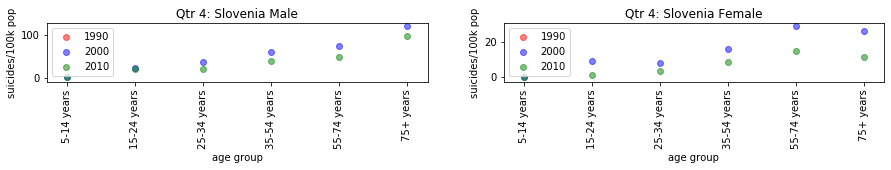

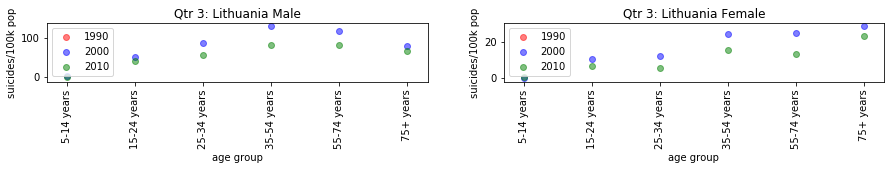

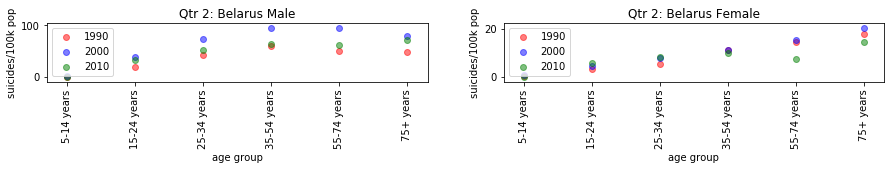

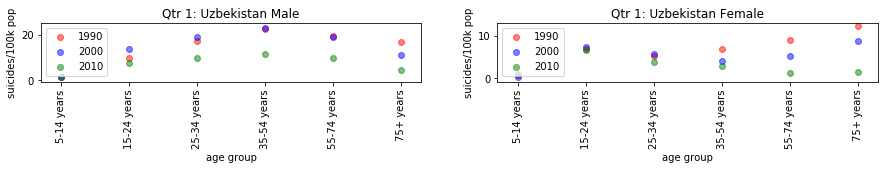

In [16]:
# Quartile 4 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_4_male = df_1990_qtr_4[df_1990_qtr_4.sex == 'male'].copy()
df_2000_qtr_4_male = df_2000_qtr_4[df_2000_qtr_4.sex == 'male'].copy()
df_2010_qtr_4_male = df_2010_qtr_4[df_2010_qtr_4.sex == 'male'].copy()

# generate the male plot for the three years
# plt.subplot(1,2,1)
plt.subplot(4,2,1)
plt.scatter(df_1990_qtr_4_male['age'], df_1990_qtr_4_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_4_male['age'], df_2000_qtr_4_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_4_male['age'], df_2010_qtr_4_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 4: {qtr_4_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1, 2, 3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_4_female = df_1990_qtr_4[df_1990_qtr_4.sex == 'female'].copy()
df_2000_qtr_4_female = df_2000_qtr_4[df_2000_qtr_4.sex == 'female'].copy()
df_2010_qtr_4_female = df_2010_qtr_4[df_2010_qtr_4.sex == 'female'].copy()

# generate the female plot for the three years
#plt.subplot(1,2,2)
plt.subplot(4,2,2)
plt.scatter(df_1990_qtr_4_female['age'], df_1990_qtr_4_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_4_female['age'], df_2000_qtr_4_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_4_female['age'], df_2010_qtr_4_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 4: {qtr_4_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartile 3 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_3_male = df_1990_qtr_3[df_1990_qtr_3.sex == 'male'].copy()
df_2000_qtr_3_male = df_2000_qtr_3[df_2000_qtr_3.sex == 'male'].copy()
df_2010_qtr_3_male = df_2010_qtr_3[df_2010_qtr_3.sex == 'male'].copy()

# generate the male plot for the three years
#plt.subplot(1,2,1)
plt.subplot(4,2,3)
plt.scatter(df_1990_qtr_3_male['age'], df_1990_qtr_3_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_3_male['age'], df_2000_qtr_3_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_3_male['age'], df_2010_qtr_3_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 3: {qtr_3_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_3_female = df_1990_qtr_3[df_1990_qtr_3.sex == 'female'].copy()
df_2000_qtr_3_female = df_2000_qtr_3[df_2000_qtr_3.sex == 'female'].copy()
df_2010_qtr_3_female = df_2010_qtr_3[df_2010_qtr_3.sex == 'female'].copy()

# generate the female plot for the three years
# plt.subplot(1,2,2)
plt.subplot(4,2,4)
plt.scatter(df_1990_qtr_3_female['age'], df_1990_qtr_3_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_3_female['age'], df_2000_qtr_3_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_3_female['age'], df_2010_qtr_3_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 3: {qtr_3_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartile 2 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_2_male = df_1990_qtr_2[df_1990_qtr_2.sex == 'male'].copy()
df_2000_qtr_2_male = df_2000_qtr_2[df_2000_qtr_2.sex == 'male'].copy()
df_2010_qtr_2_male = df_2010_qtr_2[df_2010_qtr_2.sex == 'male'].copy()

# generate the male plot for the three years
#plt.subplot(1,2,1)
plt.subplot(4,2,5)
plt.scatter(df_1990_qtr_2_male['age'], df_1990_qtr_2_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_2_male['age'], df_2000_qtr_2_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_2_male['age'], df_2010_qtr_2_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 2: {qtr_2_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_2_female = df_1990_qtr_2[df_1990_qtr_2.sex == 'female'].copy()
df_2000_qtr_2_female = df_2000_qtr_2[df_2000_qtr_2.sex == 'female'].copy()
df_2010_qtr_2_female = df_2010_qtr_2[df_2010_qtr_2.sex == 'female'].copy()

# generate the female plot for the three years
# plt.subplot(1,2,2)
plt.subplot(4,2,6)
plt.scatter(df_1990_qtr_2_female['age'], df_1990_qtr_2_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_2_female['age'], df_2000_qtr_2_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_2_female['age'], df_2010_qtr_2_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 2: {qtr_2_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartileqtr_1 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_1_male = df_1990_qtr_1[df_1990_qtr_1.sex == 'male'].copy()
df_2000_qtr_1_male = df_2000_qtr_1[df_2000_qtr_1.sex == 'male'].copy()
df_2010_qtr_1_male = df_2010_qtr_1[df_2010_qtr_1.sex == 'male'].copy()

# generate the male plot for the three years
# plt.subplot(1,2,1)
plt.subplot(4,2,7)
plt.scatter(df_1990_qtr_1_male['age'], df_1990_qtr_1_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_1_male['age'], df_2000_qtr_1_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_1_male['age'], df_2010_qtr_1_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 1: {qtr_1_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_1_female = df_1990_qtr_1[df_1990_qtr_1.sex == 'female'].copy()
df_2000_qtr_1_female = df_2000_qtr_1[df_2000_qtr_1.sex == 'female'].copy()
df_2010_qtr_1_female = df_2010_qtr_1[df_2010_qtr_1.sex == 'female'].copy()

# generate the female plot for the three years
# plt.subplot(1,2,2)
plt.subplot(4,2,8)
plt.scatter(df_1990_qtr_1_female['age'], df_1990_qtr_1_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_1_female['age'], df_2000_qtr_1_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_1_female['age'], df_2010_qtr_1_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 1: {qtr_1_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

plt.show()

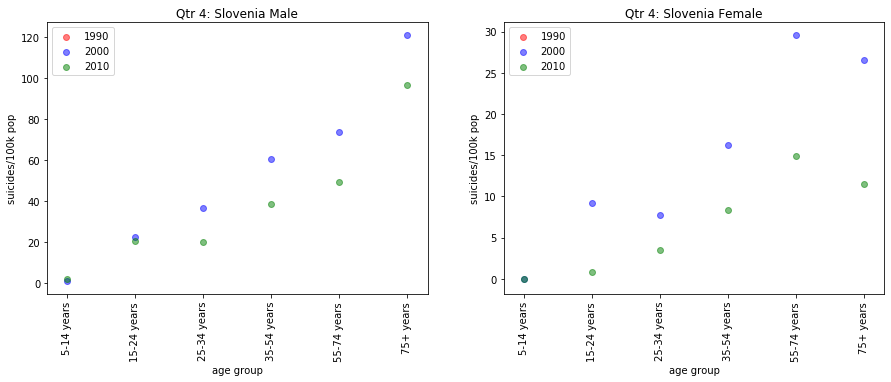

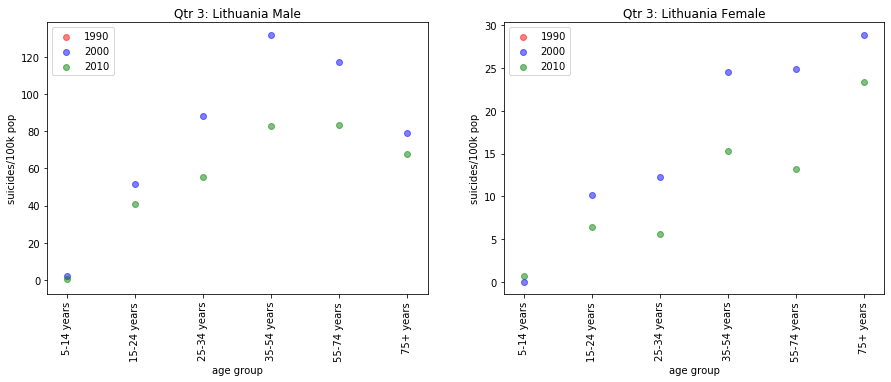

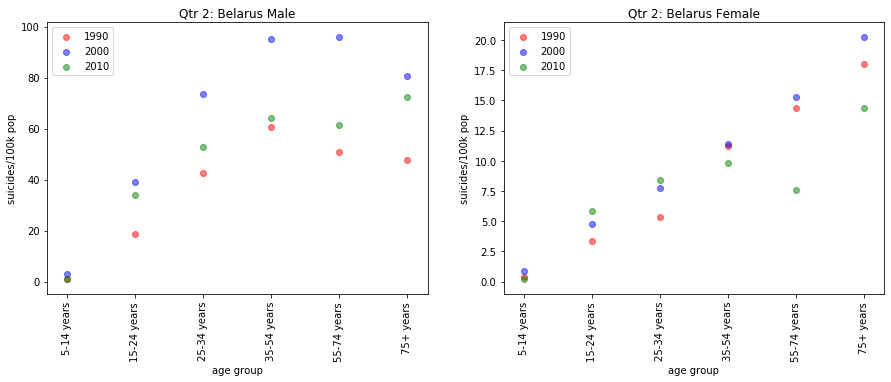

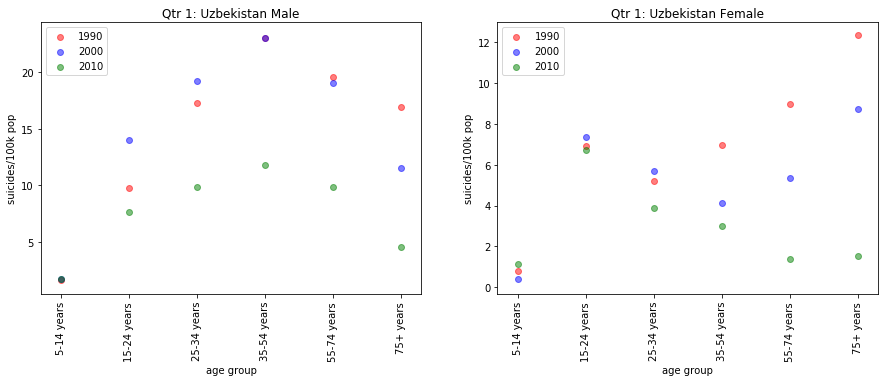

In [29]:
# Quartile 4 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_4_male = df_1990_qtr_4[df_1990_qtr_4.sex == 'male'].copy()
df_2000_qtr_4_male = df_2000_qtr_4[df_2000_qtr_4.sex == 'male'].copy()
df_2010_qtr_4_male = df_2010_qtr_4[df_2010_qtr_4.sex == 'male'].copy()

# generate the male plot for the three years
plt.subplot(1,2,1)
plt.scatter(df_1990_qtr_4_male['age'], df_1990_qtr_4_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_4_male['age'], df_2000_qtr_4_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_4_male['age'], df_2010_qtr_4_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 4: {qtr_4_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1, 2, 3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_4_female = df_1990_qtr_4[df_1990_qtr_4.sex == 'female'].copy()
df_2000_qtr_4_female = df_2000_qtr_4[df_2000_qtr_4.sex == 'female'].copy()
df_2010_qtr_4_female = df_2010_qtr_4[df_2010_qtr_4.sex == 'female'].copy()

# generate the female plot for the three years
plt.subplot(1,2,2)
plt.scatter(df_1990_qtr_4_female['age'], df_1990_qtr_4_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_4_female['age'], df_2000_qtr_4_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_4_female['age'], df_2010_qtr_4_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 4: {qtr_4_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartile 3 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_3_male = df_1990_qtr_3[df_1990_qtr_3.sex == 'male'].copy()
df_2000_qtr_3_male = df_2000_qtr_3[df_2000_qtr_3.sex == 'male'].copy()
df_2010_qtr_3_male = df_2010_qtr_3[df_2010_qtr_3.sex == 'male'].copy()

# generate the male plot for the three years
plt.subplot(1,2,1)
plt.scatter(df_1990_qtr_3_male['age'], df_1990_qtr_3_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_3_male['age'], df_2000_qtr_3_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_3_male['age'], df_2010_qtr_3_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 3: {qtr_3_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_3_female = df_1990_qtr_3[df_1990_qtr_3.sex == 'female'].copy()
df_2000_qtr_3_female = df_2000_qtr_3[df_2000_qtr_3.sex == 'female'].copy()
df_2010_qtr_3_female = df_2010_qtr_3[df_2010_qtr_3.sex == 'female'].copy()

# generate the female plot for the three years
plt.subplot(1,2,2)
plt.scatter(df_1990_qtr_3_female['age'], df_1990_qtr_3_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_3_female['age'], df_2000_qtr_3_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_3_female['age'], df_2010_qtr_3_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 3: {qtr_3_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartile 2 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_2_male = df_1990_qtr_2[df_1990_qtr_2.sex == 'male'].copy()
df_2000_qtr_2_male = df_2000_qtr_2[df_2000_qtr_2.sex == 'male'].copy()
df_2010_qtr_2_male = df_2010_qtr_2[df_2010_qtr_2.sex == 'male'].copy()

# generate the male plot for the three years
plt.subplot(1,2,1)
plt.scatter(df_1990_qtr_2_male['age'], df_1990_qtr_2_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_2_male['age'], df_2000_qtr_2_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_2_male['age'], df_2010_qtr_2_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 2: {qtr_2_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_2_female = df_1990_qtr_2[df_1990_qtr_2.sex == 'female'].copy()
df_2000_qtr_2_female = df_2000_qtr_2[df_2000_qtr_2.sex == 'female'].copy()
df_2010_qtr_2_female = df_2010_qtr_2[df_2010_qtr_2.sex == 'female'].copy()

# generate the female plot for the three years
plt.subplot(1,2,2)
plt.scatter(df_1990_qtr_2_female['age'], df_1990_qtr_2_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_2_female['age'], df_2000_qtr_2_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_2_female['age'], df_2010_qtr_2_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 2: {qtr_2_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# Quartileqtr_1 Suicide Plot
plt.figure(figsize=(15, 5))

# create dfs for male
df_1990_qtr_1_male = df_1990_qtr_1[df_1990_qtr_1.sex == 'male'].copy()
df_2000_qtr_1_male = df_2000_qtr_1[df_2000_qtr_1.sex == 'male'].copy()
df_2010_qtr_1_male = df_2010_qtr_1[df_2010_qtr_1.sex == 'male'].copy()

# generate the male plot for the three years
plt.subplot(1,2,1)
plt.scatter(df_1990_qtr_1_male['age'], df_1990_qtr_1_male['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_1_male['age'], df_2000_qtr_1_male['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_1_male['age'], df_2010_qtr_1_male['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 1: {qtr_1_country} Male')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

# create dfs for femles
df_1990_qtr_1_female = df_1990_qtr_1[df_1990_qtr_1.sex == 'female'].copy()
df_2000_qtr_1_female = df_2000_qtr_1[df_2000_qtr_1.sex == 'female'].copy()
df_2010_qtr_1_female = df_2010_qtr_1[df_2010_qtr_1.sex == 'female'].copy()

# generate the female plot for the three years
plt.subplot(1,2,2)
plt.scatter(df_1990_qtr_1_female['age'], df_1990_qtr_1_female['suicides/100k pop'], color='red', alpha=0.5, label='1990')
plt.scatter(df_2000_qtr_1_female['age'], df_2000_qtr_1_female['suicides/100k pop'], color='blue', alpha=0.5, label='2000')
plt.scatter(df_2010_qtr_1_female['age'], df_2010_qtr_1_female['suicides/100k pop'], color='green', alpha=0.5, label='2010')
plt.title(f'Qtr 1: {qtr_1_country} Female')
plt.xlabel('age group')
ax = plt.gca() # grab the current axes
ax.set_xticks([1,2,3, 4, 5, 6]) # choose which x locations to have ticks
ax.set_xticklabels(to_replace_string) # list to replace ticks label
plt.xticks(rotation=90)
plt.ylabel('suicides/100k pop')
plt.legend(loc='upper left')

plt.show()

### Conclusions

After several runs of the notebook, I reached a conclusion that there is no discernable connection between HDI and suicide rate. There is clear evidence that males have a higher suicide rate than females for the time periods in this dataset.  A general conclusion can be drawn that the older a person comes the greater chance they will commit suicide; however, older ages are fraught with medical conditions and that is more likely the cause for the increased suicide rate.  Finally, since 1995, suicide rates have been in decline.  2016 shows an uptick in the suicide rate, however, the countries in 2016 are mostly from an area I would call Eastern Europe and they seem to have a high scuicide rate for the three years examined here as well.

### Further Study

Studying the data from several runs indicates that the area of the world in which the country resodes may be a better  of suicide rates than HDI.  While the other trends, age, gender, etc., seem to hold true regradless of area of world, the suicide rates do appear to be higher in some areas than others.  For example, the area I would call Eastern Europe show high suicide rates, while the area I would call the Bahamas show low suicide rates.  This may be a function of government stability and war as opposed to living standards.

To study this, a determination of areas of the world and the countries they comprise would have to be decided and then added to the dataset.  Then graphs of suicide rates by area could be examined.  